In [5]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import scipy.io as sio
import pandas as pd
import numpy as np
import os

filepath='EmoPainData/randomised P/P33_D.mat'
filepath='EmoPainData/randomised C/C63_D.mat'
data=list(sio.loadmat(filepath).values())[-1]
data=data[:,:160]
num_coordinates=26
# normalize coordinates to 0-1 range
#data[:,:num_coordinates*3] = (data[:,:num_coordinates*3]-data[:,:num_coordinates*3].min())/(data[:,:num_coordinates*3].max()-data[:,:num_coordinates*3].min())

In [7]:
feature_description = pd.read_excel('EmoPainData/FAME - Dataset Column Descriptions.xlsx')
feature_names = feature_description['Description']+':'+feature_description['Anatomical Point'].astype('str')
feature_description=feature_description.drop(['Column Number', 'Description', 'Anatomical Point'], axis=1)
feature_description.insert(0, 'feature', feature_names)

In [8]:
# visualize the dataframe
df=pd.DataFrame(data, columns=feature_names)
df

,X-position:Hip,X-position:LeftUpperLeg,X-position:LeftLowerLeg,X-position:LeftAnkle,X-position:LeftHeel,X-position:LeftToes,X-position:RightUpperLeg,X-position:RightLowerLeg,X-position:RightAnkle,X-position:RightHeel,...,Joint Energy:Spine-Hip-RightLeg,Joint Energy:Left-Knee,Joint Energy:Right-Knee,Joint Energy:Left-Elbow,Joint Energy:Right-Elbow,Joint Energy:Left-Shoulder,Joint Energy:Right-Shoulder,Joint Energy:LeftShoulder-LeftUpperLeg-LeftLowerLeg,Joint Energy:RightShoulder-RightUpperLeg-RightLowerLeg,Joint Energy:Neck
0,-2.400274,4.477066,1.335640,7.282028,16.047767,-10.648391,-10.612390,-12.659507,-3.899580,-4.010947,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-2.400274,4.477066,1.335640,7.282028,16.047767,-10.648391,-10.612390,-12.659507,-3.899580,-4.010947,...,0.000000,0.000000,0.000000,8.474932e-04,0.000190,0.000000,0.000000,0.000000,0.000000,0.000008
2,-2.400274,4.477066,1.335640,7.282028,16.047767,-10.648391,-10.612390,-12.659507,-3.899580,-4.010947,...,0.000000,0.000000,0.000000,6.065192e-05,0.000084,0.000000,0.000000,0.000000,0.000000,0.000056
3,-2.400274,4.477066,1.335640,7.282028,16.047767,-10.648391,-10.612390,-12.659507,-3.899580,-4.010947,...,0.000000,0.000000,0.000000,5.482224e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-2.400274,4.477066,1.335640,7.282028,16.047767,-10.648391,-10.612390,-12.659507,-3.899580,-4.010947,...,0.000000,0.000000,0.000000,2.664260e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13381,33.528491,40.688146,40.785766,41.427033,48.923687,25.748966,25.568864,22.145079,35.253025,39.362239,...,0.040594,0.121179,0.180982,2.739954e-02,0.182070,1.895447,0.042885,0.100214,0.007624,0.005834
13382,33.523634,40.661516,40.782841,41.470724,48.967378,25.792658,25.616245,22.155190,35.262107,39.372106,...,0.000655,0.002816,0.005683,1.873766e-04,0.004590,0.031585,0.001756,0.001431,0.000001,0.000993
13383,28.980556,34.491927,35.545598,37.498387,39.652414,20.104369,19.635659,18.084132,29.125693,32.580944,...,20.951457,28.992253,8.237800,4.811337e+00,7.730534,20.157357,30.546902,2.303966,1.465397,13375.293736
13384,18.996304,20.976426,24.029998,28.759245,19.159493,7.590134,6.478369,9.127805,15.625580,17.640388,...,72.378567,109.901719,16.160894,2.265447e+01,33.391797,0.944557,112.617554,4.397416,2.763005,990.036382


In [9]:
# Helper function that combines every 3 columns into one column of tuples
def combine_columns(df, num_points=26):
    combined_columns = {}
    # Iterate through groups of coordinates
    for i in range(0, num_points):
        point_name=df.columns[i].split(':')[-1]
        coordinate_names=['X-position:'+point_name, 'Y-position:'+point_name, 'Z-position:'+point_name]
        group = df[coordinate_names]
        combined_columns[point_name] = group.apply(np.array, axis=1)
    
    # Create a new DataFrame with combined columns
    result = pd.DataFrame(combined_columns)
    result = pd.concat([result, df.iloc[:,num_points*3:]], axis=1)
    return result

# Apply the function
result_df = combine_columns(df)
# Add extra 'subject' and 'difficulty' columns
filename=os.path.splitext(os.path.split(filepath)[-1])[0]
delim_pos=filename.find('_')
subject, difficulty = filename[:delim_pos], filename[delim_pos+1:]
result_df['Subject'] = subject
result_df['Difficulty'] = difficulty
# Show the result
result_df

,Hip,LeftUpperLeg,LeftLowerLeg,LeftAnkle,LeftHeel,LeftToes,RightUpperLeg,RightLowerLeg,RightAnkle,RightHeel,...,Joint Energy:Right-Knee,Joint Energy:Left-Elbow,Joint Energy:Right-Elbow,Joint Energy:Left-Shoulder,Joint Energy:Right-Shoulder,Joint Energy:LeftShoulder-LeftUpperLeg-LeftLowerLeg,Joint Energy:RightShoulder-RightUpperLeg-RightLowerLeg,Joint Energy:Neck,Subject,Difficulty
0,"[-2.400274, 91.954609, -2.839016]","[4.477065884972687, 85.15111032035082, 9.19631...","[1.3356398468902961, 46.90087288511024, 7.7092...","[7.282027785941973, 6.02353826625631, 3.921465...","[16.047766654230394, -1.3460449039311762, 2.93...","[-10.64839070069591, -0.9626687940312828, 6.54...","[-10.612389939816225, 84.97413582978528, -13.8...","[-12.65950650785669, 46.72793987637351, -11.03...","[-3.899580380955978, 6.389145108066508, -15.12...","[-4.010946512354259, -0.9753516443967083, -24....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C63,D
1,"[-2.400274, 91.954609, -2.839016]","[4.477065884972687, 85.15111032035082, 9.19631...","[1.3356398468902961, 46.90087288511024, 7.7092...","[7.282027785941973, 6.02353826625631, 3.921465...","[16.047766654230394, -1.3460449039311762, 2.93...","[-10.64839070069591, -0.9626687940312828, 6.54...","[-10.612389939816225, 84.97413582978528, -13.8...","[-12.65950650785669, 46.72793987637351, -11.03...","[-3.899580380955978, 6.389145108066508, -15.12...","[-4.010946512354259, -0.9753516443967083, -24....",...,0.000000,8.474932e-04,0.000190,0.000000,0.000000,0.000000,0.000000,0.000008,C63,D
2,"[-2.400274, 91.954609, -2.839016]","[4.477065884972687, 85.15111032035082, 9.19631...","[1.3356398468902961, 46.90087288511024, 7.7092...","[7.282027785941973, 6.02353826625631, 3.921465...","[16.047766654230394, -1.3460449039311762, 2.93...","[-10.64839070069591, -0.9626687940312828, 6.54...","[-10.612389939816225, 84.97413582978528, -13.8...","[-12.65950650785669, 46.72793987637351, -11.03...","[-3.899580380955978, 6.389145108066508, -15.12...","[-4.010946512354259, -0.9753516443967083, -24....",...,0.000000,6.065192e-05,0.000084,0.000000,0.000000,0.000000,0.000000,0.000056,C63,D
3,"[-2.400274, 91.954609, -2.839016]","[4.477065884972687, 85.15111032035082, 9.19631...","[1.3356398468902961, 46.90087288511024, 7.7092...","[7.282027785941973, 6.02353826625631, 3.921465...","[16.047766654230394, -1.3460449039311762, 2.93...","[-10.64839070069591, -0.9626687940312828, 6.54...","[-10.612389939816225, 84.97413582978528, -13.8...","[-12.65950650785669, 46.72793987637351, -11.03...","[-3.899580380955978, 6.389145108066508, -15.12...","[-4.010946512354259, -0.9753516443967083, -24....",...,0.000000,5.482224e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,C63,D
4,"[-2.400274, 91.954609, -2.839016]","[4.477065884972687, 85.15111032035082, 9.19631...","[1.3356398468902961, 46.90087288511024, 7.7092...","[7.282027785941973, 6.02353826625631, 3.921465...","[16.047766654230394, -1.3460449039311762, 2.93...","[-10.64839070069591, -0.9626687940312828, 6.54...","[-10.612389939816225, 84.97413582978528, -13.8...","[-12.65950650785669, 46.72793987637351, -11.03...","[-3.899580380955978, 6.389145108066508, -15.12...","[-4.010946512354259, -0.9753516443967083, -24....",...,0.000000,2.664260e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,C63,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13381,"[33.528491, 95.152863, 92.104638]","[40.68814613653929, 88.09360153398654, 103.823...","[40.785765832421156, 54.67853652591229, 122.76...","[41.427032882747405, 13.222649859538663, 121.4...","[48.92368656657959, 6.0350229102776405, 126.39...","[25.748966121268413, 5.894754238482749, 112.65...","[25.56886444831177, 88.35709930684402, 80.7513...","[22.145079165038823, 50.55478328318457, 86.618...","[35.25302466934943, 12.735525292811332, 75.730...","[39.36223859653937, 8.715838333862617, 65.4676...",...,0.180982,2.739954e-02,0.182070,1.895447,0.042885,0.100214,0.007624,0.005834,C63,D
13382,"[33.52363

In [10]:
dataset_folder='EmoPainData/randomised C'
for fp in os.listdir(dataset_folder)[:2]:
    print(os.path.splitext(fp)[-1])
    fp = os.path.join(dataset_folder, fp)
    saving_fp = os.path.splitext(fp)[0]+'.csv'
    #df.to_csv(saving_fp)

.csv
.mat


In [11]:
# apply data extraction to every .mat file
dataset_folder='EmoPainData/randomised P'
feature_description = pd.read_excel('EmoPainData/FAME - Dataset Column Descriptions.xlsx')
num_coordinates=26
whole_data_df = pd.DataFrame()
for filepath in os.listdir(dataset_folder):
    if os.path.splitext(filepath)[-1] != '.mat':
        continue
    filepath = os.path.join(dataset_folder, filepath)
    print(filepath)
    data=list(sio.loadmat(filepath).values())[-1]
    data=data[:,:160]
    df=pd.DataFrame(data, columns=feature_names)
    result_df = combine_columns(df)
    # Add extra 'subject' and 'difficulty' columns
    filename=os.path.splitext(os.path.split(filepath)[-1])[0]
    delim_pos=filename.find('_')
    subject, difficulty = filename[:delim_pos], filename[delim_pos+1:]
    result_df['Subject'] = subject
    result_df['Difficulty'] = difficulty
    # save 
    saving_fp = os.path.splitext(filepath)[0]+'.csv'
    result_df.to_csv(saving_fp)
    whole_data_df = pd.concat([whole_data_df, result_df], axis=0)


EmoPainData/randomised P\P33_D.mat
EmoPainData/randomised P\P33_N.mat
EmoPainData/randomised P\P38_D.mat
EmoPainData/randomised P\P38_N.mat
EmoPainData/randomised P\P42_N.mat
EmoPainData/randomised P\P54_D.mat
EmoPainData/randomised P\P55_D.mat
EmoPainData/randomised P\P55_N.mat
EmoPainData/randomised P\P58_N.mat
EmoPainData/randomised P\P62_D.mat
EmoPainData/randomised P\P63_D.mat
EmoPainData/randomised P\P63_N.mat
EmoPainData/randomised P\P68_D.mat
EmoPainData/randomised P\P68_N.mat
EmoPainData/randomised P\P70_D.mat
EmoPainData/randomised P\P70_N.mat
EmoPainData/randomised P\P77_D.mat
EmoPainData/randomised P\P77_N.mat
EmoPainData/randomised P\P81_D.mat
EmoPainData/randomised P\P81_N.mat
EmoPainData/randomised P\P83_D.mat
EmoPainData/randomised P\P83_N.mat
EmoPainData/randomised P\P84_D.mat
EmoPainData/randomised P\P84_N.mat
EmoPainData/randomised P\P86_N.mat
EmoPainData/randomised P\P87_N.mat
EmoPainData/randomised P\P92_D.mat
EmoPainData/randomised P\P92_N.mat
EmoPainData/randomis

In [12]:
whole_data_df.to_pickle('P.pkl')

In [102]:
whole_data_df.to_csv('P.csv')

In [17]:
result_df.values.shape
np.array(result_df.values).shape

(13386, 26)

In [31]:
#float(result_df.values)
arr_float = np.array(result_df.values.tolist(), dtype=float)
arr_float.shape

(13386, 26, 3)

In [7]:
# Prepare data for animation
p = {result_df.columns[i]:i for i in range(len(result_df.columns))}
coordinates = [np.array(result_df[col].tolist()) for col in result_df.columns]
coordinates = np.stack(coordinates)  # Shape: (num_groups, num_frames, 3)
num_frames = 5400
coordinates=coordinates[:,:num_frames]  # first 10 seconds

In [8]:
coordinates.shape

(26, 5400, 3)

In [9]:
# Define lines to connect points (indices of the points to connect)
lines = [
    # Head and Neck
    (p['Crown'], p['Head']),
    (p['Head'], p['Neck']),

    # Spine
    (p['Neck'], p['Spine 1']),
    (p['Spine 1'], p['Spine']),
    (p['Spine'], p['Hip']),

    # Left Arm
    (p['Neck'], p['LeftShoulder']),
    (p['LeftShoulder'], p['LeftUpperArm']),
    (p['LeftUpperArm'], p['LeftLowerArm']),
    (p['LeftLowerArm'], p['LeftWrist']),
    (p['LeftWrist'], p['LeftFingertip']),

    # Right Arm
    (p['Neck'], p['RightShoulder']),
    (p['RightShoulder'], p['RightUpperArm']),
    (p['RightUpperArm'], p['RightArm']),
    (p['RightArm'], p['RightWrist']),
    (p['RightWrist'], p['RightFingertip']),

    # Left Leg
    (p['Hip'], p['LeftUpperLeg']),
    (p['LeftUpperLeg'], p['LeftLowerLeg']),
    (p['LeftLowerLeg'], p['LeftAnkle']),
    (p['LeftAnkle'], p['LeftHeel']),
    (p['LeftHeel'], p['LeftToes']),

    # Right Leg
    (p['Hip'], p['RightUpperLeg']),
    (p['RightUpperLeg'], p['RightLowerLeg']),
    (p['RightLowerLeg'], p['RightAnkle']),
    (p['RightAnkle'], p['RightHeel']),
    (p['RightHeel'], p['RightToes'])
]

d:\PhD\PainAssessment\BodyMovement\.venv\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (d:\PhD\PainAssessment\BodyMovement\.venv\Lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


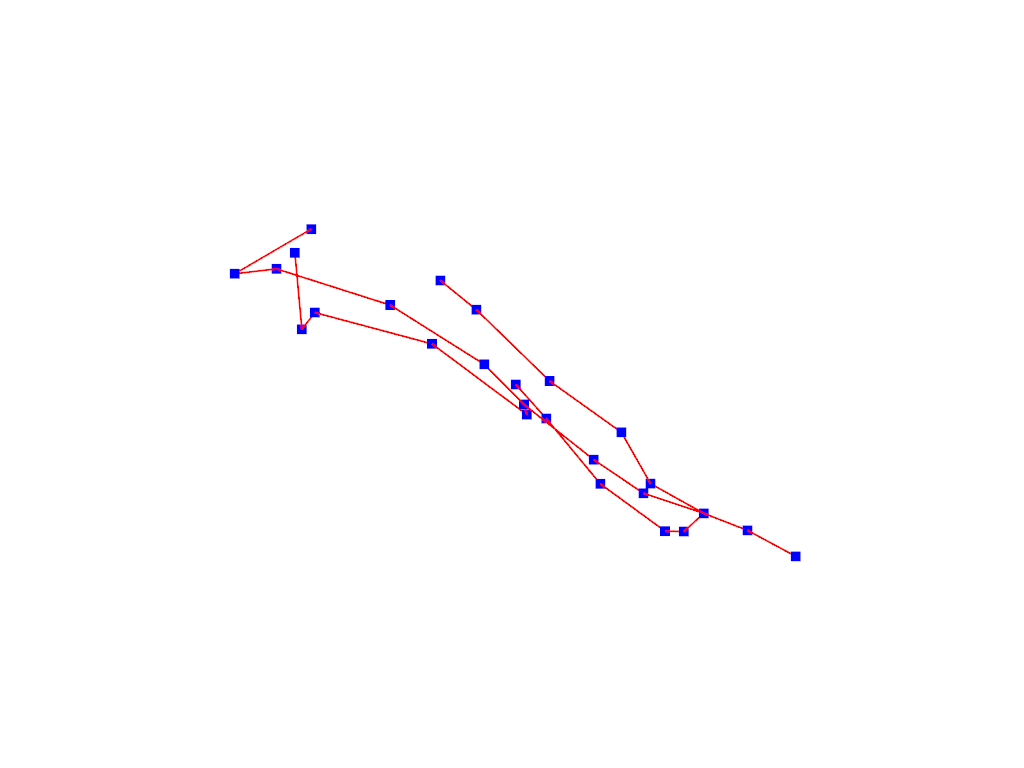

In [10]:
# visualize movements of the subject using the body kepoint coordinates
import pyvista as pv
import numpy as np

# Example large dataset: 26 points, 10,000 frames
num_points = 26

# Convert lines to PyVista format
line_segments = []
for line in lines:
    line_segments.append(len(line))  # Number of points in the line (always 2 here)
    line_segments.extend(line)      # Indices of points to connect

line_segments = np.array(line_segments)

# Initialize PyVista plotter
plotter = pv.Plotter()

# Create a point cloud
points = coordinates[:, 0, :]
point_cloud = pv.PolyData(coordinates[:, 0, :])
plotter.add_points(point_cloud, color="blue", point_size=10)

# Add lines connecting the points
poly_data = pv.PolyData()
poly_data.points = points
poly_data.lines = line_segments
plotter.add_mesh(poly_data, color="red", line_width=2)

# Update function for animation
def update(frame):
    # Update point positions
    point_cloud.points = coordinates[:, frame, :]  # Update point positions
    plotter.update()
    # Update line positions
    poly_data.points = coordinates[:, frame, :]
    plotter.update()

# Start animation
plotter.open_movie("3d_animation.mp4", 54)  # Optional: Save as MP4
plotter.show(auto_close=False)
for frame in range(num_frames):
    update(frame)
    plotter.write_frame()  # Write each frame to the movie
plotter.close()

In [11]:
import matplotlib
print(matplotlib.animation.writers.list())

AttributeError: module 'matplotlib' has no attribute 'animation'